# Amazon Product Review NLP Analysis
Text Cleaning · Top Words · N-Grams · Topic Modeling · Insights

In [1]:
import pandas as pd
import numpy as np
import string

import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import seaborn as sns
sns.set(style="whitegrid")

import sys
import os
sys.path.append(os.path.abspath(".."))
from src.nlp_preprocessing import apply_text_cleaning
from src.nlp_preprocessing import get_top_words
from src.nlp_preprocessing import get_top_ngrams



In [2]:
df = pd.read_csv("../data/cleaned/amazon_cleaned.csv")
df.head()

product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2       24269.0   
1         349.0                 43.0     4.0       43994.0   
2        1899.0                 90.0     3.9        7928.0   
3         699.0                 53.0     4.2       94363.0   
4         399.0                 61.0     4.2       16905.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   

                                           user_name  \
0  Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1  ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2  Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3  Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4  rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   

                                           review_id  \
0  R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1  RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2  R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4  R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...   

                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  \
0  Looks durable Charging is fine tooNo complains...   
1  I ordered this cable to connect my phone to An...   
2  Not quite durable and sturdy,https://m.media-a...   
3  Good product,long wire,Charges good,Nice,I bou...   
4  Bought this instead of original apple, does th...   

                                            img_link  \
0  https://m.media-amazon.com/images/W/WEBP_40237...   
1  https://m.media-amazon.com/images/W/WEBP_40237...   
2  https://m.media-amazon.com/images/W/WEBP_40237...   
3  https://m.media-amazon.com/images/I/41V5FtEWPk...   
4  https://m.media-amazon.com/images/W/WEBP_40237...   

                                        product_link          main_category  
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  Computers&Accessories  
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  Computers&Accessories  
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  Computers&Accessories  
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  Computers&Accessories  
4  https://www.amazon.in/Po

##### Stopword → kata yang tidak penting untuk analisis, misal “the, this, those”.

##### Stemming → menyatukan bentuk kata yang sama, misal:

- “playing”

- “played”

- “plays”

- Semua jadi “play”.

In [3]:
x = df[["review_title", "review_content"]]

print("Sebelum Cleaning")
print(x.head())

df = apply_text_cleaning(df, "review_title", "cleaned_title")
df = apply_text_cleaning(df, "review_content", "cleaned_content")

print("\nSesudah Cleaning")
print(df[["cleaned_title", "cleaned_content"]].head())


Sebelum Cleaning
                                        review_title  \
0  Satisfied,Charging is really fast,Value for mo...   
1  A Good Braided Cable for Your Type C Device,Go...   
2  Good speed for earlier versions,Good Product,W...   
3  Good product,Good one,Nice,Really nice product...   
4  As good as original,Decent,Good one for second...   

                                      review_content  
0  Looks durable Charging is fine tooNo complains...  
1  I ordered this cable to connect my phone to An...  
2  Not quite durable and sturdy,https://m.media-a...  
3  Good product,long wire,Charges good,Nice,I bou...  
4  Bought this instead of original apple, does th...  

Sesudah Cleaning
                                       cleaned_title  \
0  satisfi charg realli fast valu money product r...   
1  a good braid cabl your type c devic good quali...   
2  good speed earlier version good product work g...   
3  good product good one nice realli nice product...   
4  as good origin 

## Top Words

In [4]:
df["cleaned_all"] = df["cleaned_title"] + " " + df["cleaned_content"]

top_words = get_top_words(df["cleaned_all"])
top_words

[('good', 10407),
 ('product', 6572),
 ('i', 6295),
 ('use', 4286),
 ('not', 4179),
 ('qualiti', 3191),
 ('work', 2687),
 ('the', 2516),
 ('it', 2474),
 ('price', 1992),
 ('one', 1909),
 ('nice', 1894),
 ('cabl', 1886),
 ('charg', 1846),
 ('like', 1521),
 ('phone', 1507),
 ('no', 1304),
 ('money', 1293),
 ('buy', 1286),
 ('best', 1264)]

# WordCloud

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
all_text = " ".join(df['cleaned_title'])

wc_title = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=200
).generate(all_text)

In [7]:
all_text = " ".join(df['cleaned_content'])

wc_content = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_words=200
).generate(all_text)

## All Review Wordcloud

### Wordcloud Title

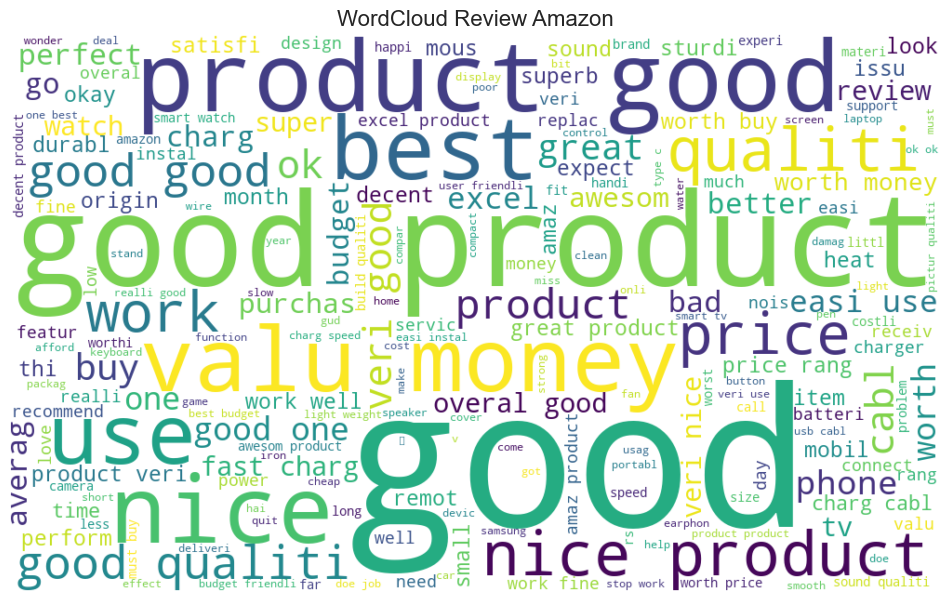

In [8]:

plt.figure(figsize=(12, 8))
plt.imshow(wc_title, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Review Amazon", fontsize=16)
plt.show()

### WordCloud Review Content

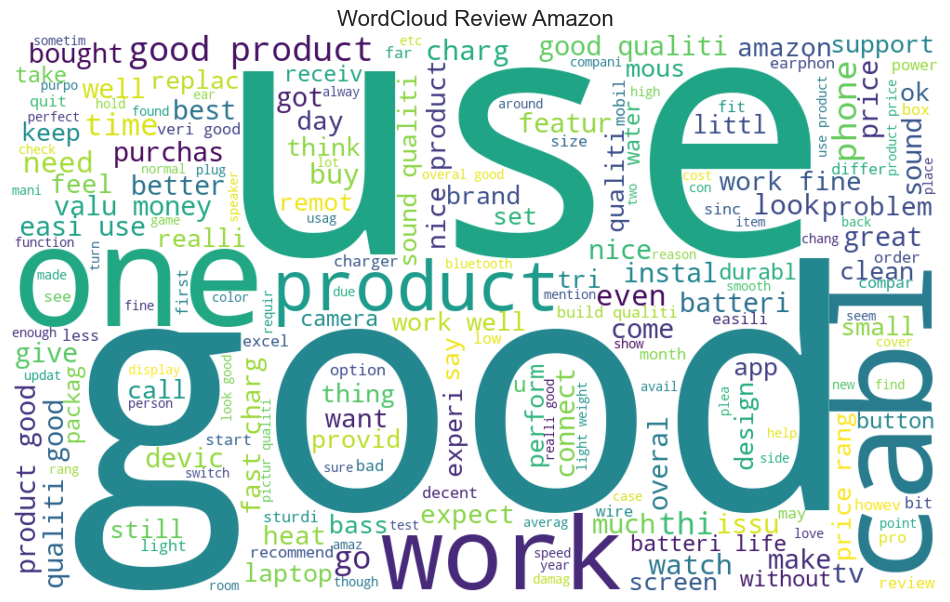

In [9]:
plt.figure(figsize=(12, 8))
plt.imshow(wc_content, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Review Amazon", fontsize=16)
plt.show()

- Berdasarkan wordcloud, analisa review produk di amazon, kata "GOOD", "USE", "quality" muncul secara dominan, yang menunjukkan bahwa pelanggan memberikan review positif.

- Namun juga muncul kata "issues", "problem" yang menandakan ada keluhan tertentu.

Hal ini bisa menjadi perhatian tim produksi untuk meningkatkan kualitas produk dalam jangka panjang tanpa harus mengandalakna harga atau diskon.

## Top 5 Category WordCloud

In [10]:
top5_cat = df['main_category'].value_counts().head(5).index
top5_cat

Index(['Electronics', 'Computers&Accessories', 'Home&Kitchen',
       'OfficeProducts', 'MusicalInstruments'],
      dtype='object', name='main_category')

### Review Title 

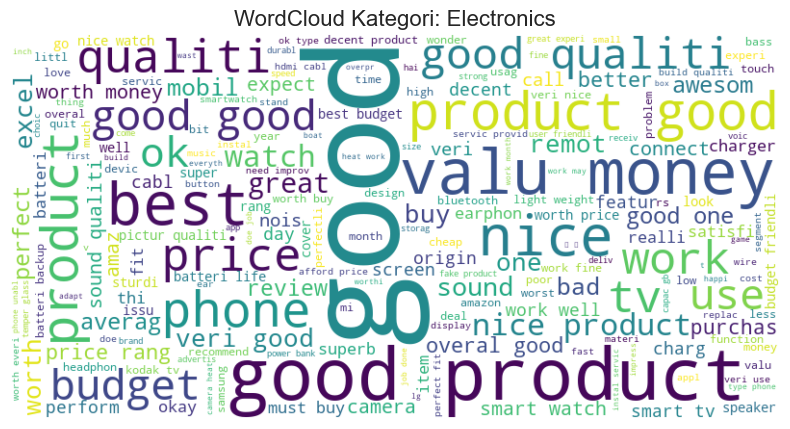

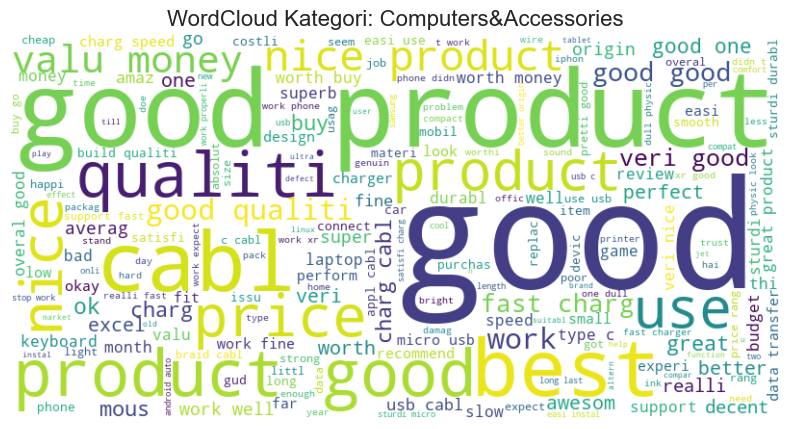

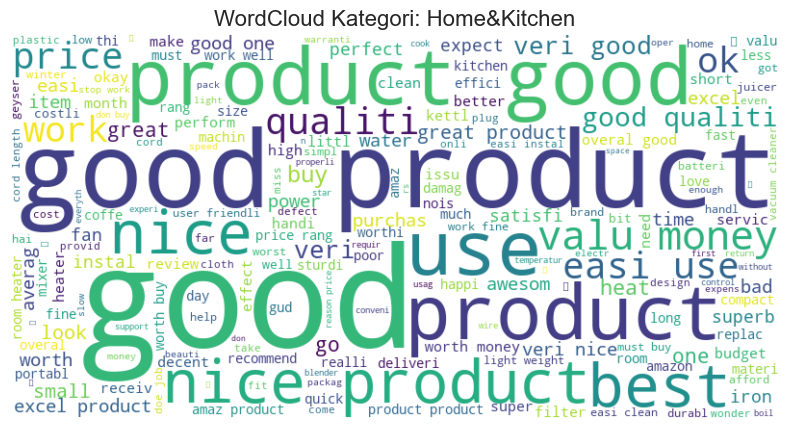

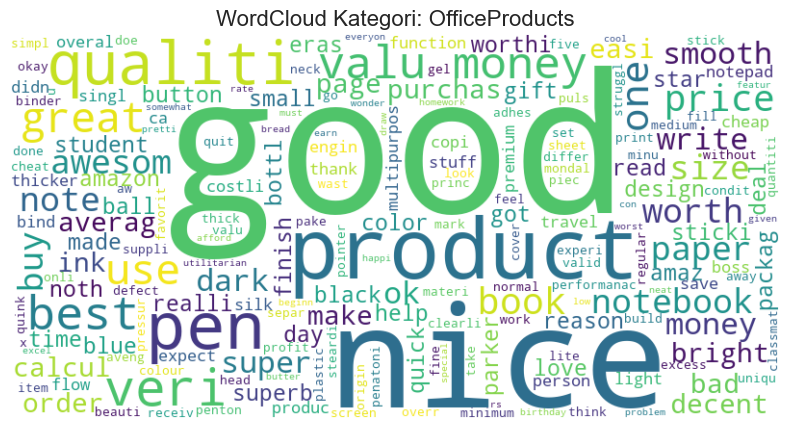

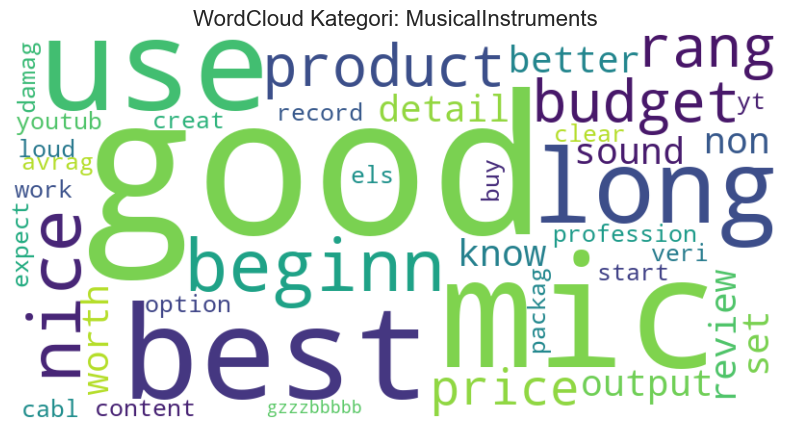

In [11]:
for cat_title in top5_cat:
    text = " ".join(df[df['main_category'] == cat_title]['cleaned_title'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Kategori: {cat_title}", fontsize=16)
    plt.show()

### Review Content

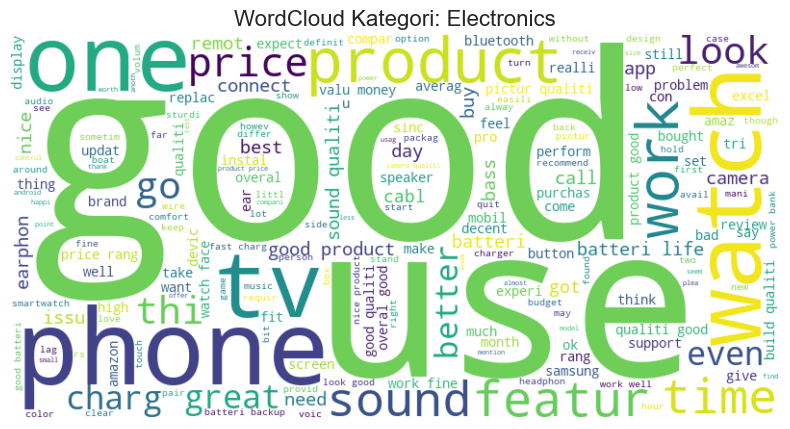

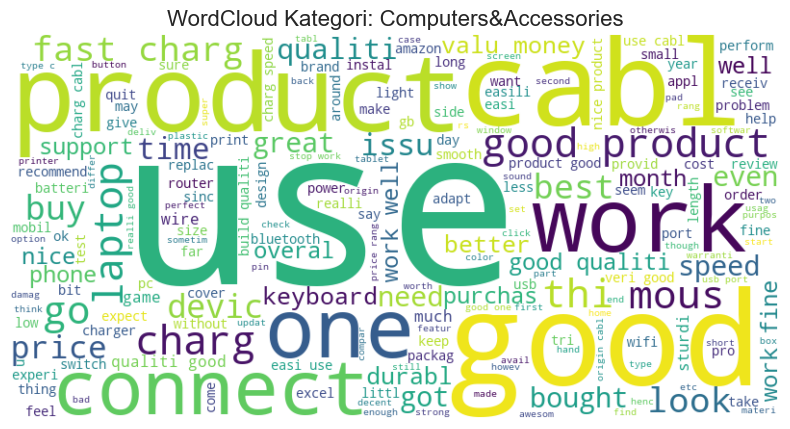

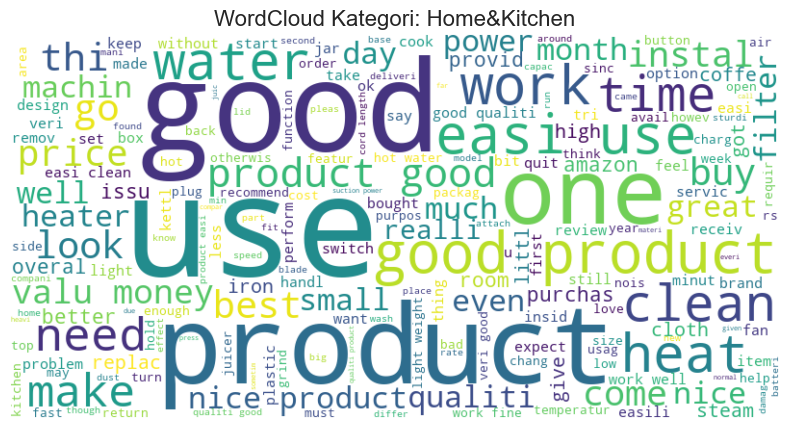

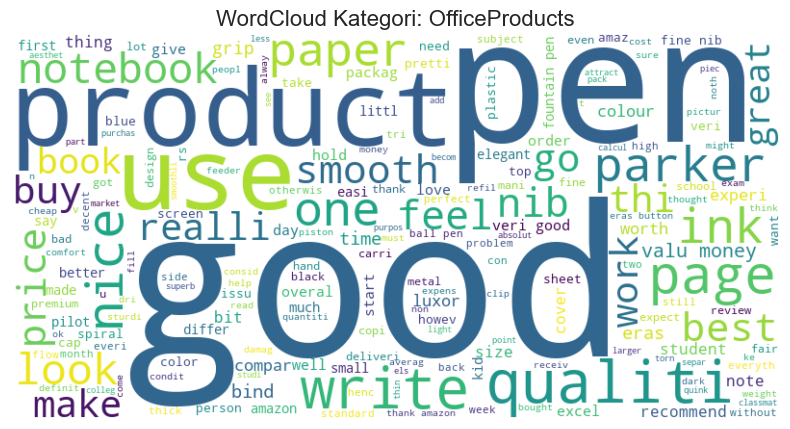

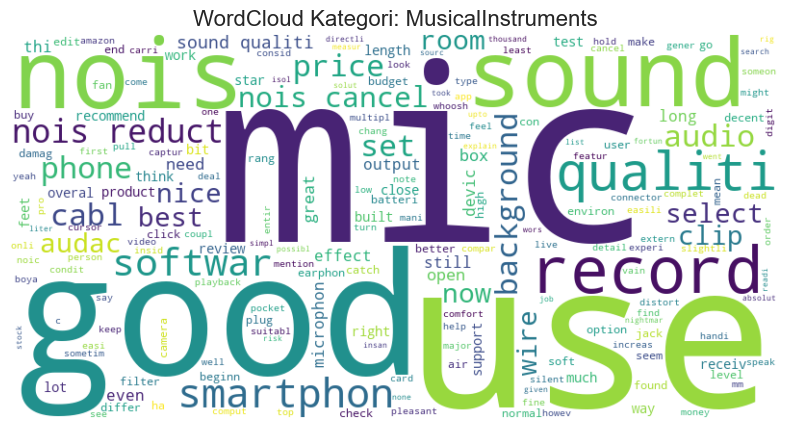

In [12]:
for cat_content in top5_cat:
    text = " ".join(df[df['main_category'] == cat_content]['cleaned_content'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Kategori: {cat_content}", fontsize=16)
    plt.show()

### Count of words in review title

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

In [14]:
title_word = {}

for cat_title in top5_cat:
    text = " ".join(df[df['main_category'] == cat_title]['cleaned_title'])
    title_word[cat_title] = text


In [15]:
top_words_per_category_by_title = {}

vectorizer = CountVectorizer(stop_words='english')

for cat_title, text in title_word.items():
    matrix = vectorizer.fit_transform([text])
    word_counts = pd.DataFrame({
        'word': vectorizer.get_feature_names_out(),
        'count': matrix.toarray().flatten()
    }).sort_values(by='count', ascending=False)

    top_words_per_category_by_title[cat_title] = word_counts.head(20)  # top 20 kata


In [16]:
top_words_per_category_by_title['Electronics']

word  count
471      good   1386
871   product    680
893   qualiti    302
741      nice    281
708     money    255
1199     valu    212
859     price    203
118      best    199
1261     work    190
822     phone    173
1172       tv    157
154    budget    153
1238    watch    143
1264    worth    138
1193      use    120
1206     veri    116
1057    sound    107
763        ok    106
168       buy    105
478     great     87

### Count of words in review content

In [17]:
content_word = {}

for cat_content in top5_cat:
    text = " ".join(df[df['main_category'] == cat_content]['cleaned_title'])
    content_word[cat_content] = text


In [18]:
top_words_per_category_by_content = {}

for cat_content, text in content_word.items():
    matrix = vectorizer.fit_transform([text])
    word_counts = pd.DataFrame({
        'word': vectorizer.get_feature_names_out(),
        'count': matrix.toarray().flatten()
    }).sort_values(by='count', ascending=False)

    top_words_per_category_by_content[cat_content] = word_counts.head(20)  # top 20 kata


In [19]:
top_words_per_category_by_content['Electronics']

word  count
471      good   1386
871   product    680
893   qualiti    302
741      nice    281
708     money    255
1199     valu    212
859     price    203
118      best    199
1261     work    190
822     phone    173
1172       tv    157
154    budget    153
1238    watch    143
1264    worth    138
1193      use    120
1206     veri    116
1057    sound    107
763        ok    106
168       buy    105
478     great     87

## Sentiment Analysis

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [21]:
df['sentiment_title'] = df['cleaned_title'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_content'] = df['cleaned_content'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [22]:
df[['main_category','cleaned_title','cleaned_content','sentiment_title','sentiment_content']].head()

main_category                                      cleaned_title  \
0  Computers&Accessories  satisfi charg realli fast valu money product r...   
1  Computers&Accessories  a good braid cabl your type c devic good quali...   
2  Computers&Accessories  good speed earlier version good product work g...   
3  Computers&Accessories  good product good one nice realli nice product...   
4  Computers&Accessories  as good origin decent good one secondari use b...   

                                     cleaned_content  sentiment_title  \
0  look durabl charg fine no complain charg reall...           0.8910   
1  i order cabl connect phone android auto car th...           0.9652   
2  not quit durabl nice product work well it real...           0.9638   
3  good product long wire charg good nice i bough...           0.9694   
4  bought instead origin appl work rs not fast ap...           0.9559   

   sentiment_content  
0             0.6908  
1             0.9605  
2            -0.3744  
3             0.9657  
4             0.9724

##### kategori mana yang paling disukai user?

##### kategori mana yang banyak keluhan?

In [23]:
sent_cat = (
    df.groupby("main_category")[["sentiment_title", "sentiment_content"]]
      .mean()
      .sort_values("sentiment_title", ascending=False)
)

sent_cat


sentiment_title  sentiment_content
main_category                                            
MusicalInstruments            0.949150           0.988500
Toys&Games                    0.910000           0.989300
OfficeProducts                0.881887           0.965629
Computers&Accessories         0.839071           0.852341
Car&Motorbike                 0.833100           0.985100
Home&Kitchen                  0.763898           0.831372
Electronics                   0.757719           0.868669
Health&PersonalCare           0.680800           0.960800
HomeImprovement               0.655900           0.906300

- ≥ 0.05 → positif
- ≤ -0.05 → negatif

Berdasarkan rata-rata skor, seluruh kategori menunjukkan sentimen positif yang cukup tinggi (0.65–0.99). Kategori Toys & Games, Office Products, dan Musical Instruments memiliki sentimen tertinggi, menunjukkan tingkat kepuasan pelanggan yang sangat baik. Sementara itu kategori Electronics dan Home & Kitchen memiliki skor yang lebih rendah, mengindikasikan adanya kombinasi review positif dan beberapa keluhan kecil.

<Figure size 1000x500 with 0 Axes>

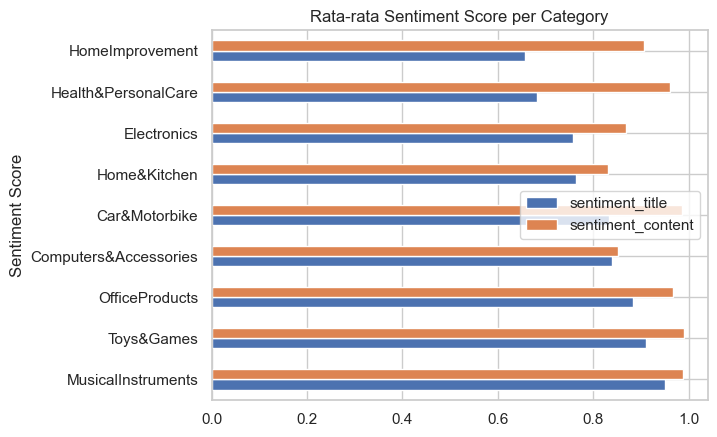

In [24]:
plt.figure(figsize=(10,5))
sent_cat.plot(kind='barh')
plt.title("Rata-rata Sentiment Score per Category")
plt.ylabel("Sentiment Score")
plt.show()


## N-gram

### N-Gram Review Title

In [25]:
bigrams_title = get_top_ngrams(df["cleaned_title"], n=2, top=20)
trigrams_title = get_top_ngrams(df["cleaned_title"], n=3, top=20)
print("N-Gram Review Title")
bigrams_title[:10], trigrams_title[:10]

N-Gram Review Title


([(('good', 'product'), 973),
  (('product', 'good'), 432),
  (('valu', 'money'), 430),
  (('nice', 'product'), 339),
  (('good', 'qualiti'), 284),
  (('good', 'good'), 228),
  (('veri', 'good'), 198),
  (('good', 'one'), 136),
  (('qualiti', 'good'), 134),
  (('easi', 'use'), 119)],
 [(('good', 'product', 'good'), 184),
  (('product', 'good', 'product'), 115),
  (('veri', 'good', 'product'), 85),
  (('good', 'good', 'product'), 77),
  (('valu', 'money', 'good'), 69),
  (('product', 'valu', 'money'), 58),
  (('nice', 'product', 'good'), 58),
  (('good', 'qualiti', 'product'), 54),
  (('good', 'valu', 'money'), 54),
  (('product', 'good', 'qualiti'), 52)])

In [26]:
def ngram_to_df(ngram_list):
    return pd.DataFrame([
        {"ngram": " ".join(gram), "freq": freq}
        for gram, freq in ngram_list
    ])

for cat_title in top5_cat:
    subset = df[df['main_category'] == cat_title]

    # hitung ulang ngram berdasarkan subset per kategori
    bigrams_title = get_top_ngrams(subset["cleaned_title"], n=2, top=20)
    trigrams_title = get_top_ngrams(subset["cleaned_title"], n=3, top=20)

    print("="*60)
    print(f"📌 Category: {cat_content} — N-Gram Review Title")
    
    print(f"\n🔹 Bigrams for {cat_content}")
    display(ngram_to_df(bigrams_title))

    print(f"\n🔹 Trigrams for {cat_content}")
    display(ngram_to_df(trigrams_title))

    print()


📌 Category: MusicalInstruments — N-Gram Review Title

🔹 Bigrams for MusicalInstruments


ngram  freq
0    good product   266
1      valu money   197
2    product good   137
3    good qualiti   100
4    nice product    87
5       good good    80
6       veri good    55
7        good one    47
8    qualiti good    45
9      money good    45
10       not good    45
11       good not    45
12        it good    42
13       not work    41
14    overal good    40
15     price rang    40
16    smart watch    36
17      good valu    35
18  sound qualiti    35
19    worth money    35


🔹 Trigrams for MusicalInstruments


ngram  freq
0      good product good    52
1        good valu money    34
2   product good product    34
3        valu money good    30
4      good good product    27
5      nice product good    24
6   good qualiti product    23
7   product good qualiti    22
8     product valu money    20
9     money good product    17
10     veri good product    17
11    good product price    15
12    valu money product    15
13      worth money good    15
14       it good product    13
15     good product nice    13
16  qualiti good product    12
17        good not excel    11
18    good product super    10
19     good product valu    10


📌 Category: MusicalInstruments — N-Gram Review Title

🔹 Bigrams for MusicalInstruments


ngram  freq
0      good product   295
1      product good   123
2      nice product   108
3        valu money   105
4      good qualiti   104
5        fast charg    77
6         veri good    72
7      qualiti good    64
8         good good    64
9        charg cabl    54
10         good one    49
11        cabl good    45
12        work well    34
13       good charg    33
14         usb cabl    31
15  qualiti product    28
16       price good    27
17        good nice    27
18        veri nice    26
19           a good    25


🔹 Trigrams for MusicalInstruments


ngram  freq
0      good product good    70
1      veri good product    36
2   product good product    28
3      good qualiti good    27
4     valu money product    24
5   qualiti good product    22
6        charg cabl good    17
7      good good product    17
8   product good qualiti    16
9         micro usb cabl    15
10  good qualiti product    13
11     product good good    13
12       good charg cabl    13
13         usb cabl good    12
14    product valu money    12
15     nice product good    12
16       valu money good    12
17     good good qualiti    11
18    support fast charg    11
19       fast charg cabl    11


📌 Category: MusicalInstruments — N-Gram Review Title

🔹 Bigrams for MusicalInstruments


ngram  freq
0      good product   395
1      product good   163
2      nice product   136
3        valu money   119
4          easi use    94
5         good good    79
6      good qualiti    74
7         veri good    66
8      product nice    46
9          use good    41
10         not good    39
11    great product    39
12         good one    36
13      product not    36
14  qualiti product    33
15        veri nice    32
16          it good    30
17     best product    30
18       money good    30
19     product veri    28


🔹 Trigrams for MusicalInstruments


ngram  freq
0      good product good    61
1   product good product    53
2      good good product    33
3      veri good product    31
4        valu money good    25
5     product valu money    24
6          easi use good    22
7   product nice product    22
8      good product nice    22
9      nice product good    20
10      product easi use    19
11  good qualiti product    18
12     good product veri    16
13   overal good product    14
14     good product easi    14
15     veri nice product    13
16  product good qualiti    13
17     product good good    13
18       good valu money    12
19     product veri good    12


📌 Category: MusicalInstruments — N-Gram Review Title

🔹 Bigrams for MusicalInstruments


ngram  freq
0      good product    15
1        valu money     9
2      nice product     7
3          nice pen     6
4      product good     6
5      good qualiti     6
6         good good     5
7         veri good     5
8         veri nice     5
9          pen good     4
10          it good     4
11         good pen     4
12    notebook good     3
13       money good     3
14  qualiti product     3
15           good i     3
16         ball pen     2
17   product smooth     2
18        nice good     2
19          not bad     2


🔹 Trigrams for MusicalInstruments


ngram  freq
0    good qualiti paper     2
1       valu money good     2
2    product valu money     2
3         nice pen good     2
4         veri nice pen     2
5         nice ball pen     1
6         ball pen good     1
7      pen good product     1
8   good product averag     1
9   product averag nice     1
10      averag nice pen     1
11          nice pen it     1
12          pen it good     1
13      it good product     1
14  good product smooth     1
15    product smooth it     1
16      smooth it write     1
17        it write like     1
18      write like flow     1
19       like flow silk     1


📌 Category: MusicalInstruments — N-Gram Review Title

🔹 Bigrams for MusicalInstruments


ngram  freq
0        product good     2
1       detail review     1
2         review best     1
3            best set     1
4          set better     1
5        better sound     1
6        sound output     1
7        output worth     1
8          worth know     1
9            know use     1
10            use use     1
11           use good     1
12           good non     1
13     non profession     1
14  profession record     1
15         record buy     1
16          buy start     1
17        start creat     1
18      creat content     1
19     content youtub     1


🔹 Trigrams for MusicalInstruments


ngram  freq
0      detail review best     1
1         review best set     1
2         best set better     1
3        set better sound     1
4     better sound output     1
5      sound output worth     1
6       output worth know     1
7          worth know use     1
8            know use use     1
9            use use good     1
10           use good non     1
11    good non profession     1
12  non profession record     1
13  profession record buy     1
14       record buy start     1
15        buy start creat     1
16    start creat content     1
17   creat content youtub     1
18    content youtub long     1
19       youtub long cabl     1

### N-Gram Review Content

In [27]:
bigrams_content = get_top_ngrams(df["cleaned_content"], n=2, top=20)
trigrams_content = get_top_ngrams(df["cleaned_content"], n=3, top=20)
print("N-Gram Review Content")
bigrams_content[:10], trigrams_content[:10]

N-Gram Review Content


([(('good', 'product'), 835),
  (('i', 'use'), 594),
  (('valu', 'money'), 481),
  (('product', 'good'), 416),
  (('good', 'qualiti'), 383),
  (('easi', 'use'), 381),
  (('qualiti', 'good'), 363),
  (('i', 'like'), 318),
  (('nice', 'product'), 304),
  (('fast', 'charg'), 295)],
 [(('i', 'like', 'product'), 84),
  (('veri', 'good', 'product'), 74),
  (('it', 'good', 'product'), 68),
  (('good', 'valu', 'money'), 63),
  (('good', 'product', 'good'), 62),
  (('good', 'product', 'price'), 59),
  (('good', 'qualiti', 'product'), 59),
  (('product', 'valu', 'money'), 52),
  (('the', 'product', 'good'), 50),
  (('qualiti', 'also', 'good'), 49)])

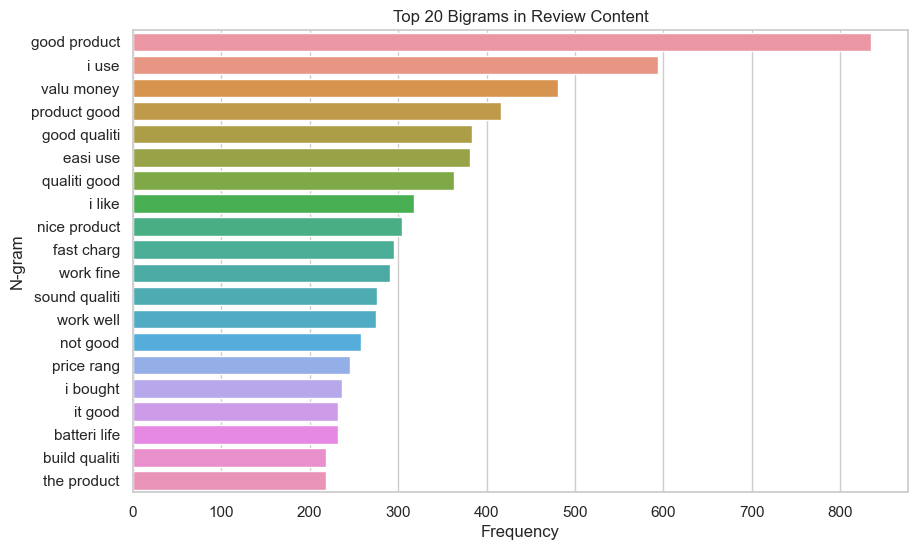

c:\Users\acer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


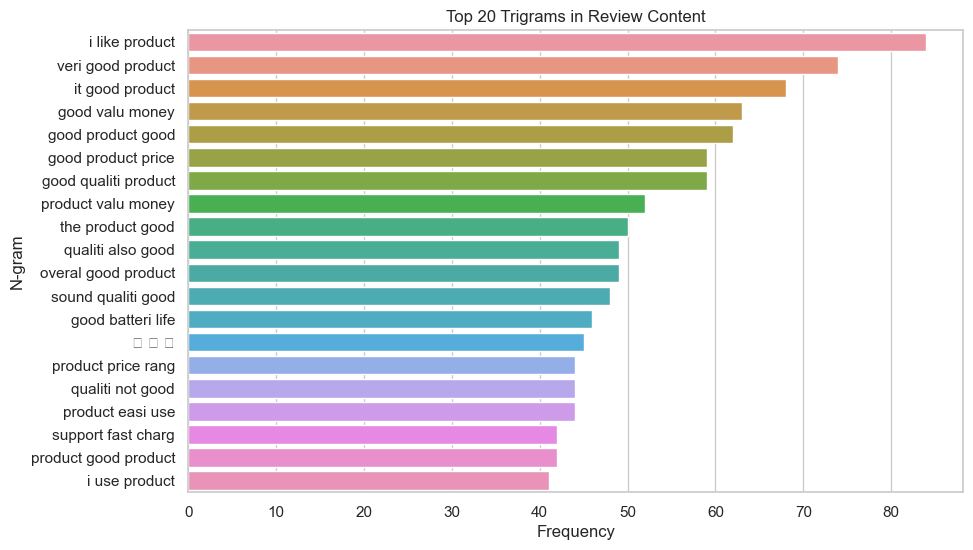

In [28]:
def plot_ngrams(ngram_list, title):
    words = [' '.join(ng[0]) for ng in ngram_list]
    counts = [ng[1] for ng in ngram_list]

    plt.figure(figsize=(10,6))
    sns.barplot(x=counts, y=words)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.show()

plot_ngrams(bigrams_content, "Top 20 Bigrams in Review Content")
plot_ngrams(trigrams_content, "Top 20 Trigrams in Review Content")


In [29]:
def ngram_to_df(ngram_list):
    return pd.DataFrame([
        {"ngram": " ".join(gram), "freq": freq}
        for gram, freq in ngram_list
    ])

for cat_content in top5_cat:
    subset = df[df['main_category'] == cat_content]

    # hitung ulang ngram berdasarkan subset per kategori
    bigrams_content = get_top_ngrams(subset["cleaned_content"], n=2, top=20)
    trigrams_content = get_top_ngrams(subset["cleaned_content"], n=3, top=20)

    print("="*60)
    print(f"📌 Category: {cat_content} — N-Gram Review Content")
    
    print(f"\n🔹 Bigrams for {cat_content}")
    display(ngram_to_df(bigrams_content))

    print(f"\n🔹 Trigrams for {cat_content}")
    display(ngram_to_df(trigrams_content))

    print()


📌 Category: Electronics — N-Gram Review Content

🔹 Bigrams for Electronics


ngram  freq
0     good product   257
1    sound qualiti   254
2            i use   231
3     batteri life   209
4     qualiti good   191
5       valu money   183
6   pictur qualiti   169
7       price rang   163
8     good qualiti   159
9         not good   147
10          i like   137
11    product good   123
12           i not   122
13       work fine   120
14     overal good   109
15          good i   106
16       also good   105
17        i bought   103
18      watch face   103
19   build qualiti    99


🔹 Trigrams for Electronics


ngram  freq
0     sound qualiti good    44
1      good batteri life    43
2        good valu money    34
3      qualiti also good    31
4      hour minut approx    31
5       qualiti not good    30
6      batteri life good    30
7    pictur qualiti good    29
8     product price rang    27
9     good product price    27
10  good qualiti product    27
11     the sound qualiti    27
12   overal good product    26
13     not work properli    25
14   batteri backup good    25
15    good sound qualiti    24
16    camera qualiti not    24
17           set top box    23
18       it good product    23
19       price rang good    20


📌 Category: Computers&Accessories — N-Gram Review Content

🔹 Bigrams for Computers&Accessories


ngram  freq
0    good product   260
1      fast charg   219
2           i use   214
3      valu money   136
4    good qualiti   128
5       work well   113
6       work fine   113
7    qualiti good   108
8    product good    95
9   build qualiti    88
10       i bought    87
11   nice product    86
12       the cabl    84
13      veri good    84
14     charg cabl    80
15         i like    76
16    charg speed    70
17            ★ ★    69
18       easi use    67
19    the product    67


🔹 Trigrams for Computers&Accessories


ngram  freq
0                  ★ ★ ★    45
1     support fast charg    37
2      veri good product    31
3         i like product    26
4        fast charg cabl    26
5             i use cabl    21
6   product qualiti good    20
7        it good product    20
8     build qualiti good    20
9           fast charg i    20
10     veri good qualiti    18
11       the charg speed    17
12         i bought cabl    17
13     good product good    17
14       good fast charg    16
15     good qualiti good    16
16        micro usb cabl    15
17    good product price    14
18  good qualiti product    14
19     cabl good qualiti    13


📌 Category: Home&Kitchen — N-Gram Review Content

🔹 Bigrams for Home&Kitchen


ngram  freq
0   good product   307
1       easi use   282
2   product good   186
3     valu money   146
4          i use   130
5   nice product   122
6    the product    97
7         i like    94
8   good qualiti    86
9    use product    76
10    easi clean    75
11     work well    70
12       it good    67
13     veri good    63
14  light weight    60
15      not good    58
16     hot water    58
17      not work    55
18     work fine    54
19  like product    53


🔹 Trigrams for Home&Kitchen


ngram  freq
0         i like product    36
1       product easi use    33
2          good easi use    30
3       the product good    28
4      veri good product    27
5      good product good    25
6        it good product    24
7     product valu money    23
8   product good product    22
9            it easi use    22
10         easi use easi    20
11         easi use good    19
12    good product price    18
13  good qualiti product    18
14        easi use clean    17
15         i use product    17
16   overal good product    17
17       good valu money    16
18     nice product good    16
19       valu money good    15


📌 Category: OfficeProducts — N-Gram Review Content

🔹 Bigrams for OfficeProducts


ngram  freq
0      valu money    13
1           i use    13
2    product good    12
3       veri good     9
4    good product     9
5    qualiti good     9
6    good qualiti     8
7    fountain pen     8
8         use pen     8
9          i like     7
10        the pen     7
11       fine nib     7
12         good i     6
13        i would     6
14  qualiti paper     6
15       ball pen     5
16        it good     5
17       pen good     5
18         pen it     5
19      pen thank     4


🔹 Trigrams for OfficeProducts


ngram  freq
0      good qualiti paper     4
1           make one feel     3
2        pen thank amazon     2
3              good i use     2
4    good product product     2
5      paper qualiti nice     2
6      product valu money     2
7      paper qualiti good     2
8             i would say     2
9       veri good qualiti     2
10        price littl bit     2
11    qualiti realli good     2
12        realli good the     2
13         i like product     2
14      page qualiti good     2
15           the pen good     2
16        good valu money     2
17  notebook qualiti good     2
18         the book great     2
19      book great condit     2


📌 Category: MusicalInstruments — N-Gram Review Content

🔹 Bigrams for MusicalInstruments


ngram  freq
0         nois reduct     9
1         nois cancel     8
2       sound qualiti     7
3     background nois     5
4               i use     4
5           long cabl     3
6   smartphon earphon     3
7       use smartphon     3
8       audac softwar     3
9             i think     3
10         audio clip     3
11        open effect     3
12          not great     3
13             i mean     3
14          mic catch     3
15            note it     2
16         need sound     2
17         sound card     2
18            mm jack     2
19   normal smartphon     2


🔹 Trigrams for MusicalInstruments


ngram  freq
0            need sound card     2
1   normal smartphon earphon     2
2          use audac softwar     2
3         select entir audio     2
4           entir audio clip     2
5            audio clip open     2
6           clip open effect     2
7           open effect nois     2
8         effect nois reduct     2
9          phone not support     2
10   background nois increas     2
11             note it readi     1
12               it readi go     1
13              readi go mic     1
14               go mic need     1
15            mic need sound     1
16           sound card plug     1
17             card plug use     1
18         plug use directli     1
19         use directli even     1

- Terlihat bahwa rata rata kata reviewnya adalah positif
- Musical Instruments memiliki review yang sangat positif dengan dominannya kata produk yang bagus (good product, easi use) begitu juga dengan Office Product.
- Electronics yang mana kategori terjual banyak mendapatkan review positif dan terdapat review negatif terbanyak di antara top 5 kategori lainnya.

## Topic Modelling

In [31]:
df["all_text_topic_model"] = df["cleaned_title"] + " " + df["cleaned_content"]

In [32]:
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df["all_text_topic_model"])

lda = LatentDirichletAllocation(
    n_components=5,       # jumlah topiknya
    random_state=42,
    learning_method='batch'
)
lda.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

In [33]:
def print_topics(model, vectorizer, top_n=15):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topik #{idx+1}")
        print([words[i] for i in topic.argsort()[-top_n:]])
        print("")

print_topics(lda, vectorizer)


Topik #1
['time', 'buy', 'clean', 'best', 'valu', 'like', 'price', 'water', 'money', 'veri', 'qualiti', 'work', 'nice', 'easi', 'use']

Topik #2
['money', 'buy', 'like', 'issu', 'pictur', 'mous', 'price', 'remot', 'instal', 'sound', 'connect', 'work', 'use', 'qualiti', 'tv']

Topik #3
['overal', 'look', 'laptop', 'buy', 'great', 'nice', 'best', 'ear', 'earphon', 'bass', 'like', 'price', 'sound', 'use', 'qualiti']

Topik #4
['best', 'buy', 'origin', 'money', 'charger', 'phone', 'nice', 'price', 'usb', 'fast', 'use', 'qualiti', 'work', 'charg', 'cabl']

Topik #5
['charg', 'look', 'like', 'work', 'display', 'qualiti', 'day', 'screen', 'featur', 'price', 'use', 'camera', 'batteri', 'watch', 'phone']



In [34]:
topic_names = {
    0: "Kualitas Material",
    1: "Penggunaan & Kenyamanan",
    2: "Harga & Value for Money",
    3: "Pengiriman & Packaging",
    4: "Kinerja & Performance"
}

df["topic"] = lda.transform(X).argmax(axis=1)
df["topic_label"] = df["topic"].map(topic_names)

df.head()


product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2       24269.0   
1         349.0                 43.0     4.0       43994.0   
2        1899.0                 90.0     3.9        7928.0   
3         699.0                 53.0     4.2       94363.0   
4         399.0                 61.0     4.2       16905.0   

                                       about_product  \
0  High Compatibility : Compatible With iPhone 12...   
1  Compatible with all Type C enabled devices, be...   
2  【 Fast Charger& Data Sync】-With built-in safet...   
3  The boAt Deuce USB 300 2 in 1 cable is compati...   
4  [CHARGE & SYNC FUNCTION]- This cable comes wit...   

                                             user_id  ...  \
0  AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...  ...   
1  AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...  ...   
2  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...  ...   
3  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...  ...   
4  AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...  ...   

                                        product_link          main_category  \
0  https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  Computers&Accessories   
1  https://www.amazon.in/Ambrane-Unbreakable-Char...  Computers&Accessories   
2  https://www.amazon.in/Sounce-iPhone-Charging-C...  Computers&Accessories   
3  https://www.amazon.in/Deuce-300-Resistant-Tang...  Computers&Accessories   
4  https://www.amazon.in/Portronics-Konnect-POR-1...  Computers&Accessories   

                                       cleaned_title  \
0  satisfi charg realli fast valu money product r...   
1  a good braid cabl your type c devic good quali...   
2  good speed earlier version good product work g...   
3  good product good one nice realli nice product...   
4  as good origin decent good one secondari use b...   

                                     cleaned_content  \
0  look durabl charg fine no complain charg reall...   
1  i order cabl connect phone android auto car th...   
2  not quit durabl nice product work well it real...   
3  good product long wire charg good nice i bough...   
4  bought instead origin appl work rs not fast ap...   

                                         cleaned_all sentiment_title  \
0  satisfi charg realli fast valu money product r...          0.8910   
1  a good braid cabl your type c devic good quali...          0.9652   
2  good speed earlier version good product work g...          0.9638   
3  good product good one nice realli nice product...          0.9694   
4  as good origin decent good one secondari use b...          0.9559   

  sentiment_content                               all_text_topic_model topic  \
0            0.6908  satisfi charg realli fast valu money product r...     3   
1            0.9605  a good braid cabl your type c devic good quali...     3   
2           -0.3744  good speed earlier version good product work g...     3   
3            0.9657  good product good one nice realli nice product...     3   
4            0.9724  as good origin decent good one secondari use b...     3   

         

In [35]:
for cat in top5_cat:
    print("="*60)
    print(f"📌 Category: {cat}")

    # Filter review per kategori
    subset = df[df['main_category'] == cat]

    # Topik terbanyak
    top_topic = subset['topic'].value_counts().idxmax()
    top_topic_label = topic_names[top_topic]

    # Frekuensi topik
    topic_counts = subset['topic'].value_counts()

    print(f"Top Topic: {top_topic_label}")
    print(f"Topic Distribution:")
    for topic_id, count in topic_counts.items():
        print(f"   - {topic_names[topic_id]} : {count} reviews")

    print()

📌 Category: Electronics
Top Topic: Kinerja & Performance
Topic Distribution:
   - Kinerja & Performance : 149 reviews
   - Penggunaan & Kenyamanan : 146 reviews
   - Harga & Value for Money : 112 reviews
   - Pengiriman & Packaging : 62 reviews
   - Kualitas Material : 57 reviews

📌 Category: Computers&Accessories
Top Topic: Pengiriman & Packaging
Topic Distribution:
   - Pengiriman & Packaging : 247 reviews
   - Penggunaan & Kenyamanan : 90 reviews
   - Kualitas Material : 64 reviews
   - Harga & Value for Money : 51 reviews
   - Kinerja & Performance : 1 reviews

📌 Category: Home&Kitchen
Top Topic: Kualitas Material
Topic Distribution:
   - Kualitas Material : 427 reviews
   - Harga & Value for Money : 17 reviews
   - Pengiriman & Packaging : 2 reviews
   - Kinerja & Performance : 1 reviews

📌 Category: OfficeProducts
Top Topic: Kualitas Material
Topic Distribution:
   - Kualitas Material : 22 reviews
   - Harga & Value for Money : 9 reviews

📌 Category: MusicalInstruments
Top Topic:

# Kesimpulan

##### Mayoritas semua kategori memiliki review positif terlihat pada top words dan n-gramsnya yang menandakan baik.
##### Setiap kategori memiliki fokus topik yang berbeda, diambil top 5 kategori banyak terjual: 
- Electronics: performance
- Computers: packaging
- Home & Kitchen: material
- Office: material
- Musical Instruments: harga/value

##### Analisis NLP menunjukkan bahwa kualitas produk, kemudahan penggunaan, dan harga adalah faktor utama yang mempengaruhi kepuasan pelanggan secara keseluruhan. Namun, prioritas per kategori berbeda, sehingga strategi peningkatan harus ditargetkan, bukan general.


In [36]:
df.to_csv("../data/cleaned/amazon_cleaned_reviews.csv", index=False)